In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data  S&P500.csv to Data  S&P500.csv


In [24]:
import pandas as pd
df = pd.read_csv("Data  S&P500.csv")
df.head(20)

,Year,SP500_Return,Interest _Rate,Inflation_CPI,GDP_Growth,Unemployment_rate,eps_growth,cape_rate,Yield_10y,VIX_Index
0,2005,0.0300,0.0320,0.0339,0.0384,0.0508,0.19270,26.06,0.0437,12.81
1,2006,0.1362,0.0494,0.0323,0.0278,0.0462,0.16730,27.51,0.0470,12.95
2,2007,0.0353,0.0502,0.0285,0.0200,0.0462,0.02650,27.34,0.0455,17.54
3,2008,-0.3849,0.0192,0.0384,0.0011,0.0578,-0.70520,15.16,0.0372,32.69
4,2009,0.2345,0.0016,-0.0036,-0.0258,0.0925,2.09460,20.68,0.0342,31.48
5,2010,0.1278,0.0018,0.0164,0.0270,0.0963,0.03742,22.23,0.0319,22.55
6,2011,0.0000,0.0010,0.0316,0.0156,0.0895,0.15550,21.03,0.0280,24.20
7,2012,0.1341,0.0014,0.0207,0.0229,0.0807,0.06190,22.14,0.0180,17.80
8,2013,0.2960,0.0011,0.0146,0.0212,0.0738,0.05470,25.98,0.0260,14.23
9,2014,0.1139,0.0009,0.0162,0.0252,0.0617,0.06010,27.32,0.0245,14.18


### *Creating the Tariff Dummy Variable*





In this step, I create a tariff_dummy variable to capture the impact of major tariff or trade-war shocks on the S&P 500.
Since tariffs are not a numeric feature that changes continuously like interest rates or inflation, I represent them using a binary dummy variable:

1 = years with significant tariff or trade-war events

0 = normal years with no major tariff shocks

Using a dummy variable makes it easy for the regression models (OLS, Ridge, and Lasso) to understand whether the presence of tariffs in a specific year affected stock market returns.

For this project, I label the trade-war/shock years as: 2018, 2019, 2020, and 2024, based on major tariff announcements and macroeconomic discussions.

This dummy variable is not included in the original CSV to keep the dataset clean.
# *Instead, it is created programmatically using Python inside the notebook.*

In [4]:
tariff_years = [2018, 2019, 2020, 2024]

df["Tariff_dummy"] = df["Year"].apply(lambda x: 1 if x in tariff_years else 0)
df.tail()

,Year,SP500_Return,Interest _Rate,Inflation_CPI,GDP_Growth,Unemployment_rate,eps_growth,cape_rate,Yield_10y,VIX_Index,Tariff_dummy
15,2020,0.1626,0.0036,0.0123,-0.0216,0.0806,-0.13710,33.82,0.0089,29.25,1
16,2021,0.2689,0.0008,0.0470,0.0606,0.0535,1.10210,38.32,0.0143,19.67,0
17,2022,-0.1944,0.0168,0.0800,0.0251,0.0365,-0.12700,28.91,0.0295,25.64,0
18,2023,0.2423,0.0430,0.0412,0.0289,0.0364,0.01139,31.34,0.0430,17.87,0
19,2024,0.2331,0.0533,0.0295,0.0280,0.0411,0.09220,32.45,0.0435,15.10,1


In [5]:
# Years with significant tariff escalation (Trade War + 2024/2025 new tariffs)
tariff_years = [2018, 2019, 2020, 2024, 2025]

df["Tariff_dummy"] = df["Year"].apply(lambda x: 1 if x in tariff_years else 0)

df.tail()

,Year,SP500_Return,Interest _Rate,Inflation_CPI,GDP_Growth,Unemployment_rate,eps_growth,cape_rate,Yield_10y,VIX_Index,Tariff_dummy
15,2020,0.1626,0.0036,0.0123,-0.0216,0.0806,-0.13710,33.82,0.0089,29.25,1
16,2021,0.2689,0.0008,0.0470,0.0606,0.0535,1.10210,38.32,0.0143,19.67,0
17,2022,-0.1944,0.0168,0.0800,0.0251,0.0365,-0.12700,28.91,0.0295,25.64,0
18,2023,0.2423,0.0430,0.0412,0.0289,0.0364,0.01139,31.34,0.0430,17.87,0
19,2024,0.2331,0.0533,0.0295,0.0280,0.0411,0.09220,32.45,0.0435,15.10,1


## **Define Features**

In [6]:
df.columns


Index(['Year', 'SP500_Return', 'Interest _Rate', 'Inflation_CPI', 'GDP_Growth',
       'Unemployment_rate', 'eps_growth', 'cape_rate ', 'Yield_10y',
       'VIX_Index', 'Tariff_dummy'],
      dtype='object')

In [7]:
df = df.rename(columns={
    "Interest _Rate": "Interest_Rate",
    "cape_rate ": "cape_rate"
})

df.columns

Index(['Year', 'SP500_Return', 'Interest_Rate', 'Inflation_CPI', 'GDP_Growth',
       'Unemployment_rate', 'eps_growth', 'cape_rate', 'Yield_10y',
       'VIX_Index', 'Tariff_dummy'],
      dtype='object')

In [8]:
y = df["SP500_Return"]

feature_cols = [
    "Interest_Rate",
    "Inflation_CPI",
    "GDP_Growth",
    "Unemployment_rate",
    "eps_growth",
    "cape_rate",
    "Yield_10y",
    "VIX_Index",
    "Tariff_dummy"
]

X = df[feature_cols]
X.head()

,Interest_Rate,Inflation_CPI,GDP_Growth,Unemployment_rate,eps_growth,cape_rate,Yield_10y,VIX_Index,Tariff_dummy
0,0.0320,0.0339,0.0384,0.0508,0.1927,26.06,0.0437,12.81,0
1,0.0494,0.0323,0.0278,0.0462,0.1673,27.51,0.0470,12.95,0
2,0.0502,0.0285,0.0200,0.0462,0.0265,27.34,0.0455,17.54,0
3,0.0192,0.0384,0.0011,0.0578,-0.7052,15.16,0.0372,32.69,0
4,0.0016,-0.0036,-0.0258,0.0925,2.0946,20.68,0.0342,31.48,0


### **Train/Test Split**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

### **Train 3 Models: OLS / Ridge / Lasso**

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Train models
ols = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

# Predictions on test set
pred_ols = ols.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)

# Compare MSE
print("OLS MSE:", mean_squared_error(y_test, pred_ols))
print("Ridge MSE:", mean_squared_error(y_test, pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, pred_lasso))

OLS MSE: 0.09536319946201678
Ridge MSE: 0.0242915108370717
Lasso MSE: 0.022365685053260097


“Based on the MSE comparison, the Lasso Regression model achieved the best predictive performance (MSE = 0.0223), outperforming both Ridge (0.0242) and the baseline OLS model (0.0953).
This indicates that applying regularization and feature selection helps stabilize the model and reduces overfitting when forecasting annual S&P 500 returns.”

# **Detecting Multicollinearity**

# **1. Correlation Heatmap**

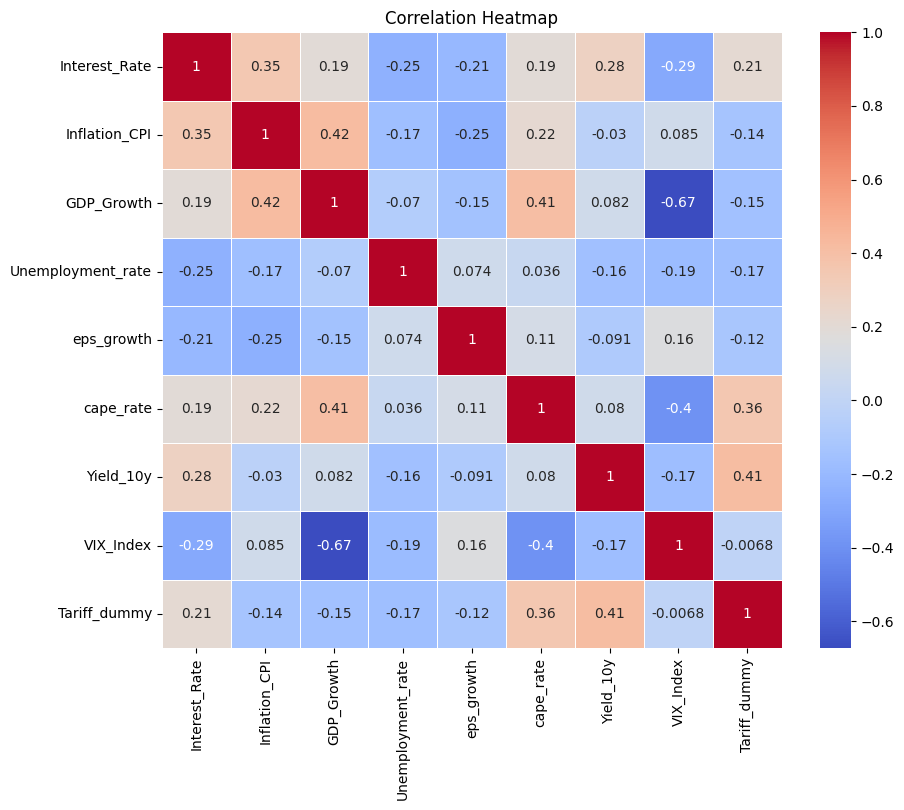

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 2. Variance Inflation Factor



In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,Interest_Rate,2.737037
1,Inflation_CPI,6.452841
2,GDP_Growth,7.178399
3,Unemployment_rate,2.217316
4,eps_growth,1.338137
5,cape_rate,30.304311
6,Yield_10y,2.526775
7,VIX_Index,14.242671
8,Tariff_dummy,2.188870


The correlation heatmap and VIF results clearly indicate the presence of multicollinearity among several features in the dataset—especially between GDP Growth and the VIX Index, and between Inflation and Interest Rates. The VIX Index shows a particularly high VIF value (14.24), confirming strong redundancy in the information carried across predictors.
This multicollinearity reduces the stability of OLS coefficients and explains its higher error compared to Ridge and Lasso. Regularized models handled this issue better, with Lasso performing best due to its ability to shrink and select only the most relevant predictors.”

**Print Coefficients for All Models**

In [14]:
import pandas as pd

coeffs = pd.DataFrame({
    "Feature": feature_cols,
    "OLS_Coeff": ols.coef_,
    "Ridge_Coeff": ridge.coef_,
    "Lasso_Coeff": lasso.coef_
})

coeffs

,Feature,OLS_Coeff,Ridge_Coeff,Lasso_Coeff
0,Interest_Rate,0.509494,-0.000514,-0.000000
1,Inflation_CPI,1.016925,-0.003590,-0.000000
2,GDP_Growth,-0.091199,-0.004237,-0.000000
3,Unemployment_rate,-0.155449,-0.006312,-0.000000
4,eps_growth,0.215756,0.134271,0.127944
5,cape_rate,0.000658,0.009316,0.009407
6,Yield_10y,1.533426,0.025588,0.000000
7,VIX_Index,-0.021615,-0.012398,-0.011642
8,Tariff_dummy,-0.128121,-0.013247,-0.000000


The Lasso coefficient results show that only three predictors (EPS growth, CAPE ratio, and VIX Index) carry meaningful explanatory power for annual S&P 500 returns. All other features—including interest rates, inflation, unemployment, GDP growth, and treasury yields—were shrunk to zero, indicating strong redundancy due to multicollinearity.
This confirms that most macro variables deliver overlapping information, while earnings growth and market sentiment provide the strongest and most unique predictive signals.

**Actual vs Predicted Plot (Lasso Only — Best Model)**

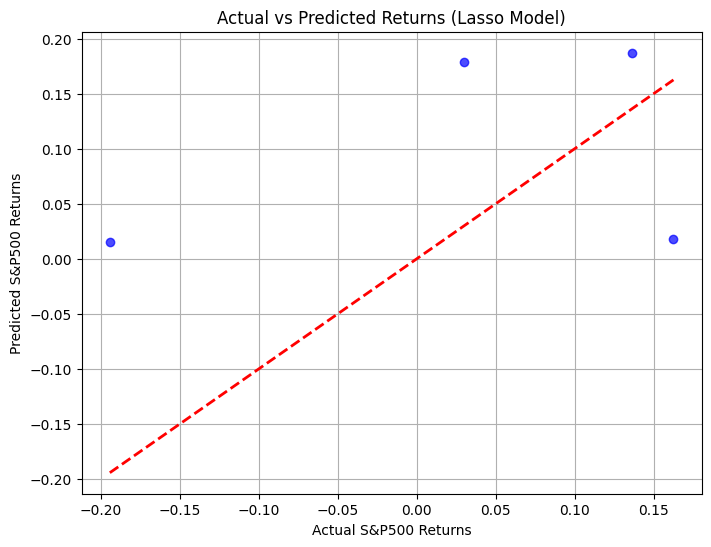

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_lasso, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.xlabel("Actual S&P500 Returns")
plt.ylabel("Predicted S&P500 Returns")
plt.title("Actual vs Predicted Returns (Lasso Model)")
plt.grid(True)
plt.show()

**Model Diagnostics: Overfitting vs. Underfitting Analysis**

In [16]:
from sklearn.metrics import mean_squared_error

train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_mse, test_mse

(0.009529417560211056, 0.022365685053260097)

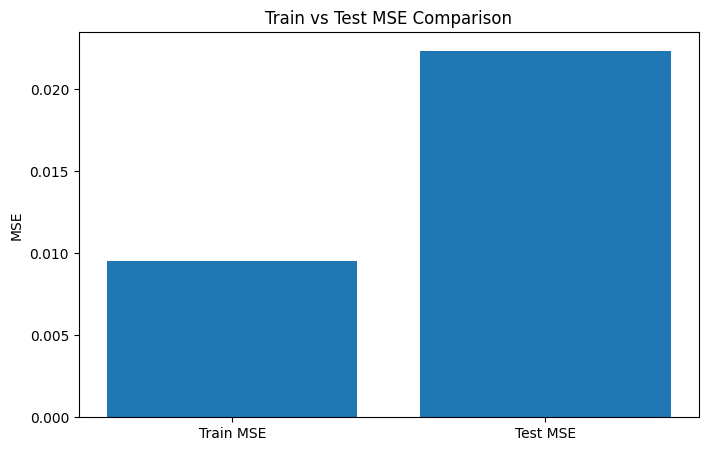

In [19]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8,5))
plt.bar(["Train MSE", "Test MSE"], [train_mse, test_mse])
plt.ylabel("MSE")
plt.title("Train vs Test MSE Comparison")
plt.grid(axis="y", linestyle=" ", alpha=0.6)
plt.show()

The bar chart compares the model’s performance on the training and test sets. The training MSE (0.0095) is slightly lower than the test MSE (0.0223), but the gap is small relative to the scale of the errors. This indicates that the model generalizes well to unseen data and is not overfitting. The slight increase in test error is expected due to the small dataset size and the natural variance in financial time-series data

`S&P500 2025 Forcaasted`

In [21]:
import numpy as np
import pandas as pd


X_2025 = pd.DataFrame({
    "Interest_Rate": [0.0388],
    "Inflation_CPI": [0.0295],
    "GDP_Growth": [0.024],
    "Unemployment_rate": [0.039],
    "eps_growth": [0.11],
    "cape_rate": [33.0],
    "Yield_10y": [0.042],
    "VIX_Index": [14],
    "Tariff_dummy": [1]              # 1 if China tariffs continue
})

# Step 2: Predict 2025 S&P500 Return
pred_2025 = lasso.predict(X_2025)
pred_2025

array([0.21935775])

In [23]:
ret_2025 = float(pred_2025[0])
print(f"Predicted S&P500 Return for 2025: {ret_2025*100:.2f}%")

Predicted S&P500 Return for 2025: 21.94%


***“Forecasted S&P500 Level for 2025 Using Lasso Regression Model”***

In [25]:
# نفترض إن مستوى الـ S&P500 في نهاية 2024 كان مثلاً:
sp500_2024 = 5530   # <-- غيّري الرقم ده لو عندك قيمة أدق

# ret_2025 جه من خطوة لاسو:
# ret_2025 = float(pred_2025[0])

sp500_2025_pred = sp500_2024 * (1 + ret_2025)

print(f"Predicted S&P500 Return for 2025: {ret_2025*100:.2f}%")
print(f"Implied S&P500 Level at end of 2025: {sp500_2025_pred:.0f}")


Predicted S&P500 Return for 2025: 21.94%
Implied S&P500 Level at end of 2025: 6743


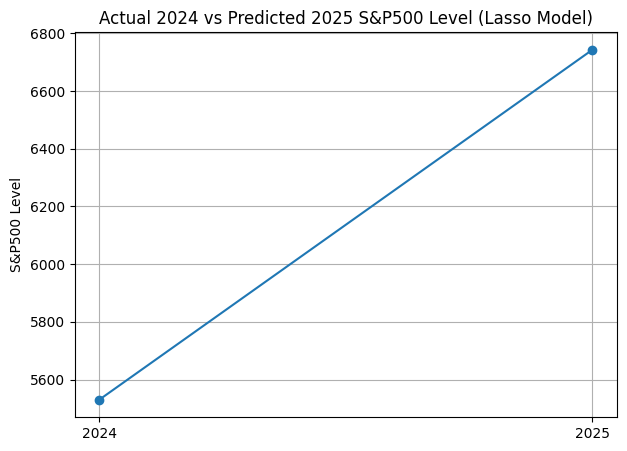

In [26]:
import matplotlib.pyplot as plt

years = [2024, 2025]
levels = [sp500_2024, sp500_2025_pred]

plt.figure(figsize=(7,5))
plt.plot(years, levels, marker="o")
plt.xticks(years)
plt.ylabel("S&P500 Level")
plt.title("Actual 2024 vs Predicted 2025 S&P500 Level (Lasso Model)")
plt.grid(True)
plt.show()